First of all we import the libraries and we read the file which contains the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
data = pd.read_csv('credit_prediction.csv')

EXPLANATORY DATA ANALYSIS

The .head command visualises the first rows of the dataset

In [4]:
data.head(3)

,id,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,26.822620,265.0,No,80.415295,NaN,312.494089,Good
1,1,23.0,Scientist,NaN,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,NaN,266.0,No,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,28.609352,267.0,No,81.699521,Low_spent_Medium_value_payments,331.209863,Good


.corr() shows the correlation between columns containing numerical values

In [5]:
corr_table = data.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10556\2032534905.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_table = data.corr()


With the following command we dive deeper into the general charateristics of the dataframe

In [6]:
print("Dataset info:")
display(data.info())
print()
print("Dataset shape:")
display(data.shape)
print()
print('Dataset description:')
display(data.describe())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  int64  
 1   Age                       90113 non-null   float64
 2   Occupation                89954 non-null   object 
 3   Annual_Income             89811 non-null   float64
 4   Monthly_Inhand_Salary     89881 non-null   float64
 5   Num_Bank_Accounts         89935 non-null   float64
 6   Num_Credit_Card           90131 non-null   float64
 7   Interest_Rate             89999 non-null   float64
 8   Num_of_Loan               90030 non-null   float64
 9   Type_of_Loan              89921 non-null   object 
 10  Delay_from_due_date       90053 non-null   float64
 11  Num_of_Delayed_Payment    89927 non-null   float64
 12  Changed_Credit_Limit      90077 non-null   float64
 13  Num_Credit_Inquiries      89971

None


Dataset shape:


(100000, 23)


Dataset description:


,id,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
count,100000.000000,90113.000000,89811.000000,89881.000000,89935.000000,90131.000000,89999.000000,90030.000000,90053.000000,89927.000000,90077.000000,89971.000000,90154.000000,89988.000000,90016.000000,89955.000000,9.010100e+04
mean,49999.500000,33.333914,50508.427543,4195.570378,5.362662,5.533756,14.523750,3.535210,21.073290,13.300655,10.472639,5.805604,1425.180996,32.286539,221.104315,647.642318,-3.699552e+22
std,28867.657797,10.765661,38260.589378,3187.983172,2.591123,2.068676,8.740063,2.449893,14.811333,6.264613,6.604692,3.871103,1153.400024,5.112481,99.670715,2078.487082,3.511497e+24
min,0.000000,14.000000,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-1.000000,-2.000000,0.500000,0.000000,0.230000,20.100770,1.000000,0.000000,-3.333333e+26
25%,24999.750000,24.000000,19375.760000,1625.265833,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.380000,3.000000,566.210000,28.056378,144.000000,70.500462,2.675203e+02
50%,49999.500000,33.000000,37062.360000,3089.424167,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,5.000000,1165.770000,32.306529,219.000000,130.603247,3.338268e+02
75%,74999.250000,42.000000,71690.050000,5955.740000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.850000,8.000000,1945.030000,36.498857,302.000000,258.734805,4.635211e+02
max,99999.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,10000.000000,1.183931e+03


We decided to filter the columns whith high correlation, this way we can focus our analysis without repeating over similar informations

In [7]:

from feature_engine.selection import DropCorrelatedFeatures

tr = DropCorrelatedFeatures(variables= None, method= 'pearson', threshold= 0.7)

corr_tr = tr.fit_transform(corr_table)

corr_tr

,id,Age,Annual_Income,Changed_Credit_Limit,Credit_Utilization_Ratio,Amount_invested_monthly,Monthly_Balance
id,1.000000,0.004053,-0.005780,0.008625,-0.006853,0.004839,0.000779
Age,0.004053,1.000000,0.094214,-0.158929,0.023721,0.006597,-0.002635
Annual_Income,-0.005780,0.094214,1.000000,-0.177471,0.177065,0.055108,-0.004711
Monthly_Inhand_Salary,-0.003586,0.092432,0.998155,-0.175202,0.178518,0.053704,-0.004176
Num_Bank_Accounts,0.003776,-0.192405,-0.285732,0.333300,-0.070942,-0.015364,0.005845
Num_Credit_Card,-0.003119,-0.147670,-0.218083,0.253572,-0.055238,-0.010274,0.004964
Interest_Rate,0.003751,-0.218744,-0.302391,0.370325,-0.077353,-0.018500,0.004477
Num_of_Loan,-0.007748,-0.215283,-0.256766,0.374885,-0.101013,-0.012386,0.001958
Delay_from_due_date,-0.005714,-0.175110,-0.249761,0.296495,-0.064390,-0.009811,0.004988
Num_of_Delayed_Payment,0.003155,-0.186063,-0.287701,0.328173,-0.072964,-0.021178,0.007799


Below we can see, through the histogram, that the distribution of the annual income is skewed to the left. This indicates that the data is composed of a majority of lower earning people, while it gets progressively less common towards the higher earning spots

<AxesSubplot: ylabel='Frequency'>

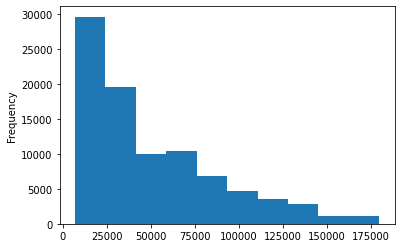

In [8]:
data['Annual_Income'].plot(kind='hist')

The kernel density estimation shows that the credit limit is usually subject to relatively small changes, as it is to be remembered that the column shows the percentage change 

<AxesSubplot: ylabel='Density'>

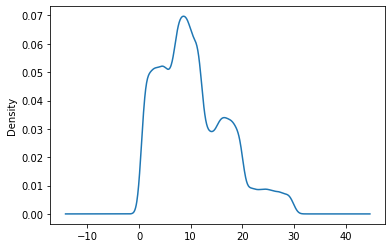

In [9]:
data['Changed_Credit_Limit'].plot(kind='kde')

The following histogram shows the distribution of general credit card use, which peaks at slightly more than 35 times per user

<AxesSubplot: ylabel='Frequency'>

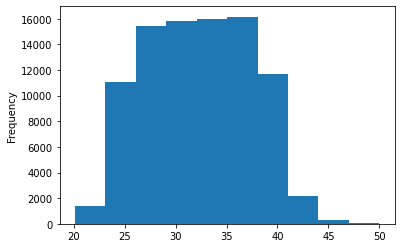

In [10]:
data['Credit_Utilization_Ratio'].plot(kind='hist')

The following graph shows that a huge majority of investments are made on smaller sums, while only an elite can invest heavily

<AxesSubplot: ylabel='Frequency'>

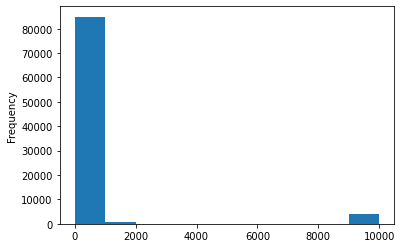

In [11]:
data['Amount_invested_monthly'].plot(kind='hist')

In the graph below we are able to determine that almost every client ends its month in a slight loss

<AxesSubplot: ylabel='Frequency'>

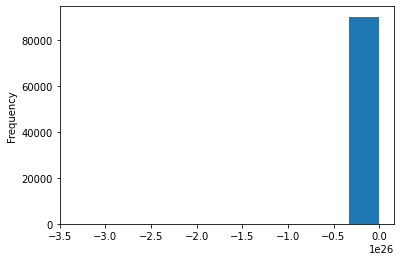

In [12]:
data['Monthly_Balance'].plot(kind='hist')

DATASET PREPROCESSING

Below we chose to substitute the median of the columns containing numerical values to the missing ones. We separated every column in order to make it easier to work on, even if it meant that at the moment of running every individual cell would result less confortable

In [13]:
age = data['Age']
age_median= age.median()
age_median

33.0

In [14]:
data['full_age']= age.isnull().astype(int)
data['Age'].fillna(age_median, inplace=True)

In [15]:
annual_income= data['Annual_Income']
annual_income_median = annual_income.median()
annual_income_median

37062.36

In [16]:
data['full_annual_income']= annual_income.isnull().astype(float)
data['Annual_Income'].fillna(annual_income_median, inplace=True)

In [17]:
monthly_inhand = data['Monthly_Inhand_Salary']
monthly_inhand_median = monthly_inhand.median()
monthly_inhand_median

3089.42416666667

In [18]:
data['full_monthly_inhand']= monthly_inhand.isnull().astype(float)
data['Monthly_Inhand_Salary'].fillna(monthly_inhand_median, inplace=True)

In [19]:
num_bank_accs = data['Num_Bank_Accounts']
num_bank_accs_median = num_bank_accs.median()
num_bank_accs_median

5.0

In [20]:
data['full_num_bank_accs']= num_bank_accs.isnull().astype(float)
data['Num_Bank_Accounts'].fillna(num_bank_accs_median,inplace=True)

In [21]:
num_cred_cards = data['Num_Credit_Card']
num_cred_cards_median = num_cred_cards.median()
num_cred_cards_median

5.0

In [22]:
data['full_num_cred_cards']= num_cred_cards.isnull().astype(float)
data['Num_Credit_Card'].fillna(num_cred_cards_median, inplace=True)

In [23]:
interest_rate = data['Interest_Rate']
interest_rate_median = interest_rate.median()
interest_rate_median

13.0

In [24]:
data['full_interest_rate']= interest_rate.isnull().astype(float)
data['Interest_Rate'].fillna(interest_rate_median, inplace= True)

In [25]:
num_of_loan= data['Num_of_Loan']
num_of_loan_median= num_of_loan.median()
num_of_loan_median

3.0

In [26]:
data['full_num_of_loan']= num_of_loan.isnull().astype(float)
data['Num_of_Loan'].fillna(num_of_loan_median, inplace=True)

In [27]:
del_from_date = data['Delay_from_due_date']
del_from_date_median= del_from_date.median()
del_from_date_median

18.0

In [28]:
data['full_del_from_date']= del_from_date.isnull().astype(float)
data['Delay_from_due_date'].fillna(del_from_date_median, inplace=True)

In [29]:
num_del_payms = data['Num_of_Delayed_Payment']
num_del_payms_median= num_del_payms.median()
num_del_payms_median

14.0

In [30]:
data['full_num_del_payms']= num_del_payms.isnull().astype(float)
data['Num_of_Delayed_Payment'].fillna(num_del_payms_median, inplace=True)

In [31]:
changed_credit_lim= data['Changed_Credit_Limit']
changed_credit_lim_median= changed_credit_lim.median()
changed_credit_lim_median

9.41

In [32]:
data['full_changed_credit']= changed_credit_lim.isnull().astype(float)
data['Changed_Credit_Limit'].fillna(changed_credit_lim_median, inplace=True)

In [33]:
num_cred_inq = data['Num_Credit_Inquiries']
num_cred_inq_median = num_cred_inq.median()
num_cred_inq_median

5.0

In [34]:
data['full_num_cred_inq']= num_cred_inq.isnull().astype(float)
data['Num_Credit_Inquiries'].fillna(num_cred_inq_median, inplace=True)

In [35]:
outstanding_debt= data['Outstanding_Debt']
outstanding_debt_median= outstanding_debt.median()
outstanding_debt_median

1165.77

In [36]:
data['full_outstanding_debt']= outstanding_debt.isnull().astype(float)
data['Outstanding_Debt'].fillna(outstanding_debt_median, inplace=True)

In [37]:
credit_util_ratio= data['Credit_Utilization_Ratio']
credit_util_ratio_median = credit_util_ratio.median()
credit_util_ratio_median

32.306529174714896

In [38]:
data['full_credit_util']= credit_util_ratio.isnull().astype(float)
data['Credit_Utilization_Ratio'].fillna(credit_util_ratio_median,inplace=True)

In [39]:
credit_hist= data['Credit_History_Age']
credit_hist_median= credit_hist.median()
credit_hist_median

219.0

In [40]:
data['full_credit_hist']= credit_hist.isnull().astype(float)
data['Credit_History_Age'].fillna(credit_hist_median, inplace=True)

In [41]:
monthly_invest= data['Amount_invested_monthly']
monthly_invest_median= monthly_invest.median()
monthly_invest_median

130.603246899645

In [42]:
data['full_monthly_invest']= monthly_invest.isnull().astype(float)
data['Amount_invested_monthly'].fillna(monthly_invest_median, inplace=True)

In [43]:
monthly_bal= data['Monthly_Balance']
monthly_bal_median= monthly_bal.median()
monthly_bal_median

333.82683967306

In [44]:
data['full_monthly_bal']= monthly_bal.isnull().astype(float)
data['Monthly_Balance'].fillna(monthly_bal_median, inplace=True)

We decided to drop the columns added during the preprocessing of the above columns in order to keep the dataset tidy

In [45]:
data.drop(data.iloc[:,23:],inplace=True, axis=1)

Below are the prepocessings of the columns containing categorical values, in this case we decided to implement both LabelEncoder and OneHot encoding in order to make it easier to be used as part of the independent variable 

In the 'Occupation' column, as in a couple of others, the mode of the column is substituted to the missing values, which are later converted to numerical thanks to LabelEncoding

In [46]:
occupation= data['Occupation']
occupation_mode= occupation.mode()
occupation_mode

0    Lawyer
Name: Occupation, dtype: object

In [47]:
data['full_occ']= occupation.isnull().astype(object)
data['Occupation'].fillna(occupation_mode, inplace=True)

In [48]:
encoded_occ= LabelEncoder()
data['Occupation'] = encoded_occ.fit_transform(data['Occupation'])

In the following columns instead of the mode we decided to use the 'value_counts' command, which allowed to visualise the most frequent value and subsequently substitute it and directly susbtitute it 

In [49]:
data.value_counts(data['Type_of_Loan'])

Type_of_Loan
No Data                                                                                                                                                         10226
Not Specified                                                                                                                                                    1275
Credit-Builder Loan                                                                                                                                              1150
Personal Loan                                                                                                                                                    1138
Debt Consolidation Loan                                                                                                                                          1132
                                                                                                                                                             

In [50]:
data['Type_of_Loan'].fillna('No Data', inplace=True)

In [51]:
encoded_type_loan= LabelEncoder()
data['Type_of_Loan']= encoded_type_loan.fit_transform(data['Type_of_Loan'])

In [52]:
data.value_counts(data['Credit_Mix'])

Credit_Mix
Standard    41223
Good        27173
Bad         21499
dtype: int64

In [53]:
data['Credit_Mix'].fillna('Standard', inplace=True)

In [54]:
encoded_credit_mix = LabelEncoder()
data['Credit_Mix']= encoded_credit_mix.fit_transform(data['Credit_Mix'])

We decided to implement OneHot encoding on the specific column 'Payment_of_Min_Amount' because it made sense to make use of the only 3 different values  

In [55]:
data.value_counts(data['Payment_of_Min_Amount'])

Payment_of_Min_Amount
Yes    47077
No     32079
NM     10886
dtype: int64

In [56]:
paym_min_amount = data['Payment_of_Min_Amount']
paym_min_amount_mode = paym_min_amount.mode()
paym_min_amount_mode

0    Yes
Name: Payment_of_Min_Amount, dtype: object

In [57]:
data['full_paym_min_amount']= paym_min_amount.isnull().astype(object)
data['Payment_of_Min_Amount'].fillna(paym_min_amount_mode, inplace=True)

In [58]:
data= pd.get_dummies(data, prefix=['Payment_of_Min_Amount'], columns=['Payment_of_Min_Amount'])
data.head(2)

,id,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,full_occ,full_paym_min_amount,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,265.0,80.415295,NaN,312.494089,Good,False,False,0,1,0
1,1,23.0,12,37062.36,1824.843333,3.0,4.0,3.0,4.0,128,...,266.0,118.280222,Low_spent_Large_value_payments,284.629162,Good,False,False,0,1,0


In [59]:
payment_behav = data['Payment_Behaviour']
payment_behav_mode= data['Payment_Behaviour'].mode()
payment_behav_mode

0    Low_spent_Small_value_payments
Name: Payment_Behaviour, dtype: object

In [60]:
data['full_paym_behav']= payment_behav.isnull().astype(object)
data['Payment_Behaviour'].fillna(payment_behav_mode, inplace=True)

In [61]:
encoded_behav = LabelEncoder()
data['Payment_Behaviour']= encoded_behav.fit_transform(data['Payment_Behaviour'])
data['Payment_Behaviour'].astype(float)

0        5.0
1        3.0
2        4.0
3        5.0
4        1.0
        ... 
99995    0.0
99996    1.0
99997    0.0
99998    3.0
99999    1.0
Name: Payment_Behaviour, Length: 100000, dtype: float64

In [62]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

We convert the categorical values for "to-be-predicted" column "Credit_Score" into numerical values. 

In [63]:
convert_credit_score = {'Good' : 2, 'Standard' : 1, 'Poor' : 0}
data['Credit_Score'] = data['Credit_Score'].apply(lambda x: convert_credit_score[x])

In [64]:
data['full_occ'] = data['full_occ'].apply(lambda x: 1*x)
data['full_paym_min_amount'] = data['full_paym_min_amount'].apply(lambda x: 1*x)
# here we have logical values and we convert them by multiplying them by 1.
# 1*False -> 0
# 1*True -> 1
data['full_paym_behav'] = data['full_paym_behav'].apply(lambda x: 1*x)


### OUTLIERS REMOVAL

In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.

To remove the outliers, we compute the quartiles, which are needed to get the lower and upper bounds. Infact we need to check each value of the dataset and detect the presence of such outliers. 
We use the following formula to decide whether a value is an outliers or not:
- lower_bound = Q1 - 1.5 * IQR
- upper_bound = Q3 + 1.5 * IQR

In [65]:
quartiles = data.quantile([0.25,0.75])

In [66]:
quartiles

,id,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,full_occ,full_paym_min_amount,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,full_paym_behav
0.25,24999.75,25.0,4.0,20347.965,1724.938333,4.0,4.0,8.0,2.0,2082.0,...,76.153684,1.0,274.410263,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.75,74999.25,41.0,12.0,67531.720,5582.570625,7.0,7.0,19.0,5.0,4275.0,...,234.756906,5.0,442.440011,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [67]:
for col in data.columns:
    Q1 = quartiles[col][0.25]
    Q3 = quartiles[col][0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[ (data[col] < lower_bound) | (data[col] > upper_bound) ].index
    print("Number of outliers for column" , col, ":", len(outliers))
    data.drop(outliers, inplace=True) 

Number of outliers for column id : 0
Number of outliers for column Age : 0
Number of outliers for column Occupation : 0
Number of outliers for column Annual_Income : 3138
Number of outliers for column Monthly_Inhand_Salary : 588
Number of outliers for column Num_Bank_Accounts : 19
Number of outliers for column Num_Credit_Card : 0
Number of outliers for column Interest_Rate : 0
Number of outliers for column Num_of_Loan : 0
Number of outliers for column Type_of_Loan : 0
Number of outliers for column Delay_from_due_date : 5755
Number of outliers for column Num_of_Delayed_Payment : 0
Number of outliers for column Changed_Credit_Limit : 2263
Number of outliers for column Num_Credit_Inquiries : 519
Number of outliers for column Credit_Mix : 0
Number of outliers for column Outstanding_Debt : 4790
Number of outliers for column Credit_Utilization_Ratio : 2
Number of outliers for column Credit_History_Age : 0
Number of outliers for column Amount_invested_monthly : 8825
Number of outliers for col

In [68]:
len(data)

43169

## Analysis

We set the entirety of the preprocessed columns as independent variable and 'Credit_Score' as dependent one

In [69]:
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,24,25,26]].values
y = data.loc[:,['Credit_Score']].values
y.ravel()

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Now we implement the classifiers on the determined variables

DECISION TREE

In [73]:
from sklearn.metrics import classification_report

In [74]:
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      2927
           1       0.71      0.70      0.71      5965
           2       0.52      0.54      0.53      1901

    accuracy                           0.65     10793
   macro avg       0.62      0.62      0.62     10793
weighted avg       0.65      0.65      0.65     10793



C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


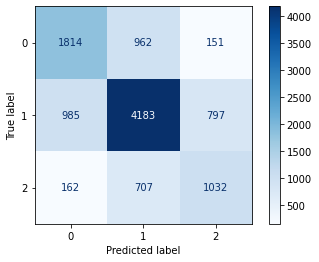

In [75]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm_tree = confusion_matrix(y_test, y_pred)
disp = plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.Blues)

The results show a functioning classifier, but it is evident that the inaccuracies are dangerously frequent

In [76]:
from sklearn.model_selection import GridSearchCV
grid = {'criterion': ['gini', 'entropy'], 'splitter': ['random', 'best']}
classifier = DecisionTreeClassifier()
clf_grid = GridSearchCV(classifier, grid, cv=10, scoring='accuracy')
clf_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['random', 'best']},
             scoring='accuracy')

In [77]:
clf_grid.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [78]:
clf_grid.cv_results_
grid_table = pd.DataFrame(clf_grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.170698,0.048391,0.001998,0.000446,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.645460,0.645769,0.651328,0.646078,0.642989,0.648857,0.649676,0.637627,0.653692,0.657708,0.647918,0.005376,4
1,0.811986,0.025952,0.001891,0.000299,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.658431,0.656578,0.670476,0.652254,0.659666,0.652254,0.662342,0.654310,0.655236,0.667593,0.658914,0.005920,1
2,0.153129,0.003470,0.001599,0.000484,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.666461,0.659975,0.635269,0.646387,0.653490,0.664299,0.647822,0.660488,0.664195,0.648440,0.654683,0.009574,3
3,1.068776,0.031533,0.001396,0.000489,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.670167,0.655034,0.659049,0.661519,0.667078,0.647313,0.666976,0.656781,0.649676,0.655545,0.658914,0.007183,2


In [79]:
for col in grid_table.columns:
  print(col)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_criterion
param_splitter
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
split5_test_score
split6_test_score
split7_test_score
split8_test_score
split9_test_score
mean_test_score
std_test_score
rank_test_score


In [80]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].sort_values(by='rank_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
1,"{'criterion': 'gini', 'splitter': 'best'}",0.658914,0.005920,1
3,"{'criterion': 'entropy', 'splitter': 'best'}",0.658914,0.007183,2
2,"{'criterion': 'entropy', 'splitter': 'random'}",0.654683,0.009574,3
0,"{'criterion': 'gini', 'splitter': 'random'}",0.647918,0.005376,4


### RANDOM FOREST

In [81]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier()
cls.fit(X_train, y_train.ravel())
y_pred = cls.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2927
           1       0.80      0.79      0.79      5965
           2       0.67      0.70      0.69      1901

    accuracy                           0.76     10793
   macro avg       0.74      0.74      0.74     10793
weighted avg       0.76      0.76      0.76     10793



C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


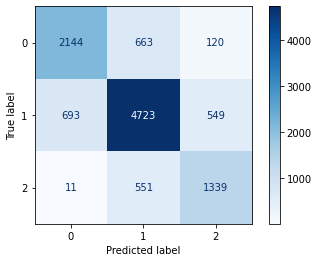

In [82]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm_randf = confusion_matrix(y_test, y_pred)

disp = plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.Blues)

It is clearly shown, if confronted to the DT confusion matrix, the decrease in the number of inaccuracies. 

In [83]:
grid = {'max_depth':[None],
              'n_estimators':[10],

              'min_samples_leaf':[1],
              'min_samples_split':[2]
           }

randf_grid = GridSearchCV(cls, grid, cv=10, scoring='accuracy')
randf_grid.fit(X_train,y_train.ravel())

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [10]},
             scoring='accuracy')

In [84]:
randf_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [85]:
randf_grid.cv_results_
grid_table = pd.DataFrame(randf_grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.937558,0.017512,0.013763,0.000979,None,1,2,10,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.741198,...,0.72483,0.739345,0.733169,0.739883,0.728452,0.744517,0.73772,0.735545,0.005825,1


In [86]:
for col in grid_table.columns:
  print(col)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_max_depth
param_min_samples_leaf
param_min_samples_split
param_n_estimators
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
split5_test_score
split6_test_score
split7_test_score
split8_test_score
split9_test_score
mean_test_score
std_test_score
rank_test_score


In [87]:
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].sort_values(by='rank_test_score', ascending=True)
grid_table_rank

,params,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.735545,0.005825,1


### XGBOOST

In [88]:
from sklearn.metrics import classification_report
!pip install xgboost
from xgboost import XGBClassifier
import time

Defaulting to user installation because normal site-packages is not writeable


In [89]:
boost_att = XGBClassifier()
boost_att.fit(X_train, y_train)
y_pred = boost_att.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      2927
           1       0.78      0.78      0.78      5965
           2       0.64      0.68      0.66      1901

    accuracy                           0.74     10793
   macro avg       0.72      0.72      0.72     10793
weighted avg       0.75      0.74      0.74     10793



C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


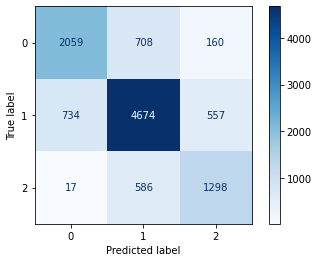

In [90]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm_boost = confusion_matrix(y_test, y_pred)

disp = plot_confusion_matrix(boost_att, X_test, y_test, cmap=plt.cm.Blues)